In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
pip install keras


In [ ]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()


In [ ]:
x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1,784)

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train,num_classes = 10)
y_test = tf.keras.utils.to_categorical(y_test,num_classes = 10)


In [ ]:
model = Sequential([
Dense(50, input_shape=(784,),activation = 'sigmoid'), #first hidden Layer
Dense(50, activation='sigmoid'), #second hidden Layer
Dense (10) #output layer
])

In [ ]:
#compile the model

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True),
              metrics=["accuracy"])

In [ ]:
#train the model

from tensorflow.keras.callbacks import EarlyStopping

batch_size = 100
max_epochs = 30
early_stopping = EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=max_epochs, validation_data=(x_test, y_test),
                    callbacks=[early_stopping])



Epoch 1/30
600/600 [==============================] - 4s 5ms/step - loss: 1.0275 - accuracy: 0.7524 - val_loss: 0.4984 - val_accuracy: 0.8800
Epoch 2/30
600/600 [==============================] - 2s 4ms/step - loss: 0.4265 - accuracy: 0.8845 - val_loss: 0.3549 - val_accuracy: 0.8964
Epoch 3/30
600/600 [==============================] - 8s 13ms/step - loss: 0.3596 - accuracy: 0.8949 - val_loss: 0.3245 - val_accuracy: 0.9073
Epoch 4/30
600/600 [==============================] - 5s 8ms/step - loss: 0.3341 - accuracy: 0.8995 - val_loss: 0.3235 - val_accuracy: 0.8992
Epoch 5/30
600/600 [==============================] - 5s 9ms/step - loss: 0.3064 - accuracy: 0.9072 - val_loss: 0.2692 - val_accuracy: 0.9199
Epoch 6/30
600/600 [==============================] - 5s 9ms/step - loss: 0.3036 - accuracy: 0.9099 - val_loss: 0.2978 - val_accuracy: 0.9079
Epoch 7/30
600/600 [==============================] - 3s 6ms/step - loss: 0.2923 - accuracy: 0.9125 - val_loss: 0.2784 - val_accuracy: 0.9168


In [ ]:
model.save('mnist_model')

In [ ]:
#Loss and accuracy
test_loss, test_accuracy = model.evaluate(x_test,y_test)

test_accuracy_percentage = test_accuracy*100

313/313 [==============================] - 1s 3ms/step - loss: 0.2692 - accuracy: 0.9199


In [ ]:
#print the model

print(test_accuracy_percentage)

91.99000000953674


In [ ]:
#Load the saved model

loaded_model = tf.keras.models.load_model('mnist_model')

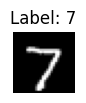

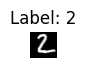

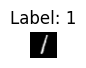

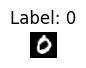

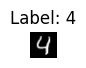

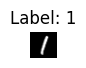

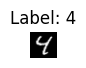

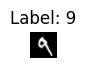

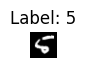

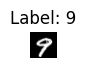

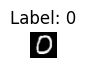

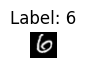

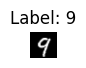

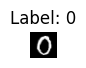

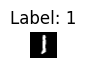

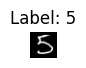

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#Load MNIST dato

(_,_),(x_test, y_test)= mnist.load_data()

#Plot some sample images

num_samples =16

plt.figure(figsize=(15, 6))

for i in range(num_samples):
  plt.subplot(1, num_samples, i+1)
  plt.imshow(x_test[i], cmap='gray')
  plt.title(f"Label: {y_test[i]}")
  plt.axis('off')
  plt.show()



In [ ]:
#Select an indes for the image you want to use

Index = 0

In [ ]:
# Define the index of the image you want to preprocess and predict
index = 2

# Preprocess the image
input_size = 28 * 28
preprocessed_image = x_test[index].reshape(1, input_size).astype('float32') / 255.0
print("Preprocessed_image shape:", preprocessed_image.shape)

Preprocessed_image shape: (1, 784)


In [ ]:
#Load the trained model

model = tf.keras.models.load_model('mnist_model')


In [ ]:
# Verify the model has been loaded
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                39250     
                                                                 
 dense_7 (Dense)             (None, 50)                2550      
                                                                 
 dense_8 (Dense)             (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#make prediction

predictions = model.predict(preprocessed_image)

predicted_label=np.argmax(predictions)

1/1 [==============================] - 0s 103ms/step
